## Praca domowa 4

#### Autor: Sabina Sidarovich

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.EU_Sales > df.NA_Sales)].reset_index()

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [3]:
df_genres = df.groupby("Genre").Global_Sales.agg("sum").reset_index()
df_genres.iloc[df_genres.Global_Sales.idxmax(), 0]

'Action'

In [4]:
df_means= df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean").reset_index()
df_means.loc[df_means.JP_Sales > df_means.EU_Sales].sort_values('JP_Sales', ascending= False).reset_index(drop = True).rename({'JP_Sales': "Średnia sprzedaż w Japonii", 
"Genre" : "Typ Gry"}, axis = 1)[["Typ Gry", "Średnia sprzedaż w Japonii"]]

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

## 1. Oryginalny wykres
Oryginalny wykres pochodzi z Wiadomości TVP i obrazuje liczbę nowych zakażeń koronawirusem w Polsce [(28 sekunda nagrania)](https://wiadomosci.tvp.pl/56540366/czwarta-fala-niezaszczepionych)


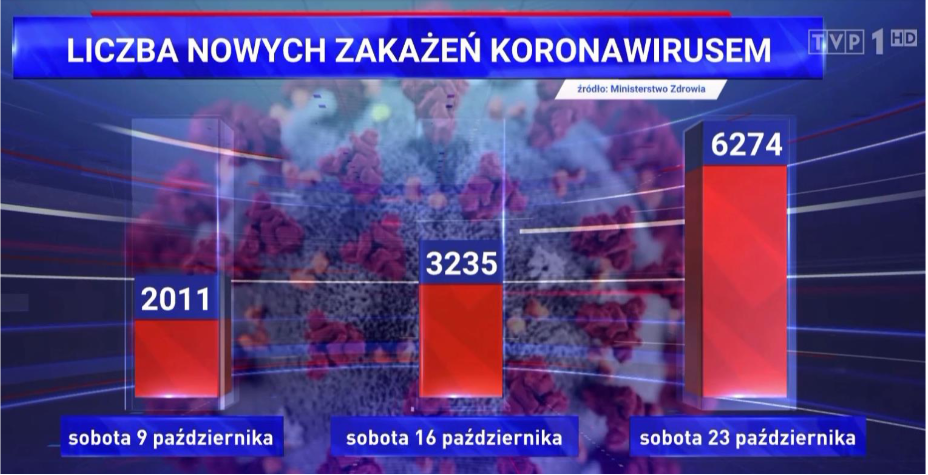

## 2. Poprawiany wykres
Poprawiany wykres został stworzony przez Jędrka Sokołowskiego, można go znależć [pod tym linkiem](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SokolowskiJedrzej/HW2_raport_Sokolowski.pdf)

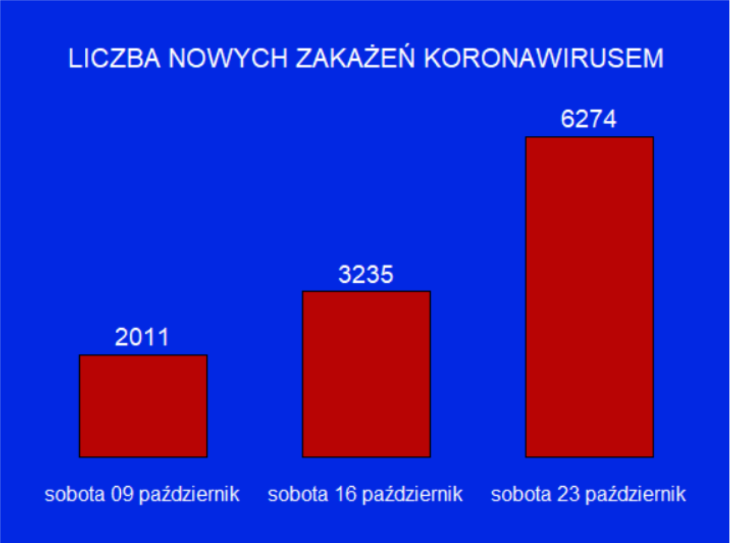

## 3. Kod w Pythonie i poprawiony wykres

In [5]:
locale.setlocale(locale.LC_ALL, "pl_PL")
liczba = [2011, 3235, 6274]
days = pd.to_datetime(["9/10/2021", "16/10/2021", "23/10/2021"], format='%d/%m/%Y').strftime('%A %d %B')
dane = pd.DataFrame({'Dzien': days,
                'Liczba_Zakazen': liczba})

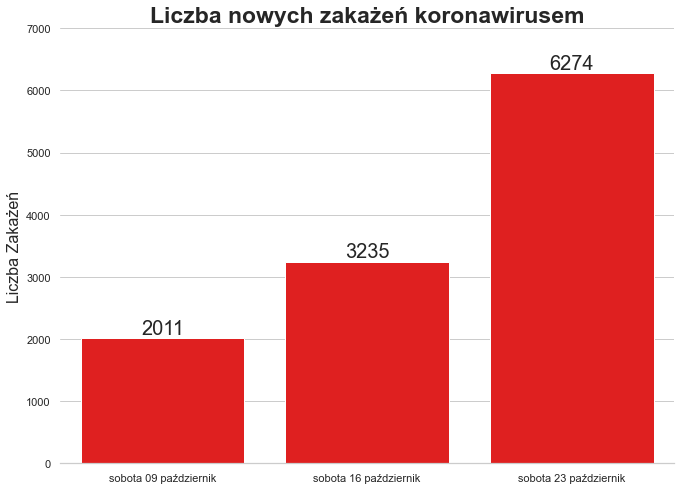

In [6]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.set_style("whitegrid")
covid = sns.barplot(x = 'Dzien', y = 'Liczba_Zakazen', data = dane,          
            color = "red")
covid.set_xlabel('')
sns.despine(left=True)
covid.set_title('Liczba nowych zakażeń koronawirusem', fontsize = 23, fontweight='bold')
for rect, label in zip(covid.patches, liczba):
    height = rect.get_height()
    covid.text(
        rect.get_x() + rect.get_width() / 2, height + 10, label, ha="center", va="bottom", fontsize = 20
    )
covid.set_ylabel('Liczba Zakażeń', fontsize=16)
#covid.bar_label(covid.containers[0])
covid.set_ylim(0, 7000)
plt.show()

## 4. Uzasadnienie

Uważam, że moja wersja wykresu jest badziej czytelna, ponieważ nie korzystałam ze słupków 3d, poprawiłam schemat kolorystyczny (w wersji ggplotowej niebieskie tło przeszkadzało w odczytywaniu danych) i dodałam linie siatki wraz z osią Y. Warto również zaznaczyć, że styl wykresu jest minimalistyczny, przez co kolumny skupiają na sobie uwagę odbiorcy.